Motion Models for fbm.

In [1]:
from AMS_BP.core.configio.configmodels import CellParameters

cellp = CellParameters(cell_type="RectangularCell",params = {"bounds":[4, 7, 3, 9,-0.5,0.5]})

print(cellp)

cell_type='RectangularCell' params={'bounds': [4, 7, 3, 9, -0.5, 0.5]}


In [2]:
from AMS_BP.core.configio.convertconfig import make_cell

rcell = make_cell(cellp)
print(
    rcell
)

RectangularCell(mesh=PolyData (0x1290009a0)
  N Cells:    12
  N Points:   8
  N Strips:   0
  X Bounds:   4.000e+00, 7.000e+00
  Y Bounds:   3.000e+00, 9.000e+00
  Z Bounds:   -5.000e-01, 5.000e-01
  N Arrays:   2, bounds=[4, 7, 3, 9, -0.5, 0.5])


In [3]:
from AMS_BP.core.configio.configmodels import MoleculeParameters

num_molecules = [1000]  
track_type = [
    "fbm",
]

allow_transition_probability = [
    False,
]  

diffusion_coefficient = [
    [
        0.04,
        0.2
    ],
]  
diffusion_track_amount = [
    [
        .50,
        0.5
    ],
]  
hurst_exponent = [
    [
        0.5,
        0.5
    ],

]  
hurst_track_amount = [
    [
        0.5,
        0.5
    ],

]  # same structure as diffusion_track_amount.

diffusion_transition_matrix = [
    [
        [
            0.5,
            0.5,
        ],
        [
            0.5,
            0.5,
        ],
    ],

]  # transition matrix for diffusion coefficients. For a particular molecule type, the probability of transitioning from one diffusion coefficient to another is given by the transition matrix. The size of the matrix is the number of diffusion coefficients for that molecule type. The rows are the current diffusion coefficient and the columns are the new diffusion coefficient.
hurst_transition_matrix = [
    [
        [
            0.5,
            0.5,
        ],
        [
            0.5,
            0.5,
        ],
    ],

]  # same as diffusion_transition_matrix but  for hurst exponents.
transition_matrix_time_step = [
    20,
]  # the time step at which the probabilities for the transition matrices are defined. In units of milliseconds.


In [4]:
# combine it into one data structure
molecule_parameters = MoleculeParameters(
    num_molecules=num_molecules,
    track_type=track_type,
    diffusion_coefficient=diffusion_coefficient,
    state_probability_diffusion=diffusion_track_amount,
    hurst_exponent=hurst_exponent,
    state_probability_hurst=hurst_track_amount,
    allow_transition_probability=allow_transition_probability,
    transition_matrix_time_step=transition_matrix_time_step,
    diffusion_transition_matrix=diffusion_transition_matrix,
    hurst_transition_matrix=hurst_transition_matrix,
)
print(molecule_parameters)

num_molecules=[1000] track_type=['fbm'] diffusion_coefficient=[[0.04, 0.2]] hurst_exponent=[[0.5, 0.5]] allow_transition_probability=[False] transition_matrix_time_step=[20] diffusion_transition_matrix=[[[0.5, 0.5], [0.5, 0.5]]] hurst_transition_matrix=[[[0.5, 0.5], [0.5, 0.5]]] state_probability_diffusion=[[0.5, 0.5]] state_probability_hurst=[[0.5, 0.5]]


In [5]:
sample_plane_dim = [
    10,
    10,
]  # in um. Describes the size of the plane on which the sample is placed.
cycle_count = 100  # Number of cycles to run the simulation for. (this would be the # of frames in a movies if a time series)
# cycle_count is 1 for each exposure_time + interval_time in the simulation.
exposure_time = 20  # in ms
interval_time = 0  # in ms
oversample_motion_time = 1  # this is the smallest time step in the simulation for the motion of the molecules. Both the exposure_time and interval_time need to be equal to or larger than this, or be 0.

from AMS_BP.core.configio.convertconfig import GlobalParameters

globalp = GlobalParameters(
    sample_plane_dim=sample_plane_dim,
    cycle_count=cycle_count,
    exposure_time=exposure_time,
    interval_time=interval_time,
    oversample_motion_time=oversample_motion_time,
)
print(globalp)

sample_plane_dim=array([10., 10.]) cycle_count=100 exposure_time=20 interval_time=0 oversample_motion_time=1


In [6]:
initial_centers = [
    [
        [
            5.5,
            5,
            0.05,
        ],
        [
            5,
            7,
            -0.15,
        ],
    ],
] # first dimension is the types of molecules. (see num_molecules) For each type there can be any number of condensates with centers [x,y,z]
initial_scale = [[0.06, 0.06]] # um
diffusion_coefficient = [ [0, 0]] # um^2/s
hurst_exponent = [ [0.2, 0.2]]
density_dif = [1000] # density of the condensate vs the background.

from AMS_BP.core.configio.convertconfig import CondensateParameters
condp = CondensateParameters(
    initial_centers=initial_centers,
    initial_scale=initial_scale,
    diffusion_coefficient=diffusion_coefficient,
    hurst_exponent=hurst_exponent,
    density_dif=density_dif,
)
print(condp)

initial_centers=[[[5.5, 5.0, 0.05], [5.0, 7.0, -0.15]]] initial_scale=[[0.06, 0.06]] diffusion_coefficient=[[0.0, 0.0]] hurst_exponent=[[0.2, 0.2]] density_dif=[1000]


In [7]:
from AMS_BP.core.configio.convertconfig import OutputParameters
outp = OutputParameters(
    output_path = "blah/blahblah",
    output_name = "datamoviename",
    subsegment_type = "any_string",
    subsegment_number = 1, # any integer
)

In [8]:
from AMS_BP.core.configio.convertconfig import ConfigList
config_list = ConfigList(
    CellParameter = cellp,
    MoleculeParameter = molecule_parameters,
    GlobalParameter = globalp,
    CondensateParameter = condp,
    OutputParameter = outp,
)

In [9]:
num_of_fluorophores = 1
fluorophore_names = ["mMaple"]


In [10]:
from AMS_BP.core.sample.flurophores.flurophore_schema import Fluorophore, State, StateTransition, SpectralData
# mMaple
mMaple_f = {
    "name" : 'mMaple',
    "initial_state" : "bright_green", # must be one of the defined states below.
}
bright_state_red = State(
            name = "bright_red",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.56, # unitless; 0-1
            extinction_coefficient_lambda_val = 30000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.000000001, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
                    intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [530.0, 583, 600.0, 650.0, 700.0], # in nm
                    intensities = [0.001,1.0,  0.52, 0.25, 0.068], # in arbitrary units
                ),
            )
bright_state_green = State(
            name = "bright_green",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.74, # unitless; 0-1
            extinction_coefficient_lambda_val = 15000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.000000001, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
                    intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [471.0, 490.0, 500.0, 505.0, 520.0, 549.0, 632.0], # in nm
                    intensities = [0.0038, 0.24, 0.86, 1.0, 0.55, 0.25, 0.004], # in arbitrary units
                ),
            )
triplet_state_red = State(
            name = "triplet_red",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
triplet_state_green = State(
            name = "triplet_green",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state_red = State(
            name = "bleached_red",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state_green = State(
            name = "bleached_green",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
transition_gtr = StateTransition(
    from_state = "bright_green",
    to_state = "bright_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [330,350,380,400,420,450], # in nm
        intensities = [0.01,0.5,1.0,0.8,0.5,0.01], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 6500,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,                
    )
transition_rtBr = StateTransition(
    from_state = "bright_red",
    to_state = "bleached_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
        intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_gtBg = StateTransition(
    from_state = "bright_green",
    to_state = "bleached_green",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
        intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_rtTr = StateTransition(
    from_state = "bright_red",
    to_state = "triplet_red",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [325.0, 411.0, 569.0, 611.0, 612.0], # in nm
        intensities = [0.355, 0.033, 1.0, 0.0075, 0.0068], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_gtTg = StateTransition(
    from_state = "bright_green",
    to_state = "triplet_green",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [353.0, 411.0, 490.0, 511.0, 527.0], # in nm
        intensities = [0.012, 0.047, 1.0, 0.125, 0.036], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )
transition_Trtr = StateTransition(
    from_state = "triplet_red",
    to_state = "bright_red",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_Tgtg = StateTransition(
    from_state = "triplet_green",
    to_state = "bright_green",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TrtBr = StateTransition(
    from_state = "triplet_red",
    to_state = "bleached_red",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TgtBg = StateTransition(
    from_state = "triplet_green",
    to_state = "bleached_green",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transitions = {
    "bright_greenbright_red" : transition_gtr,
    "bright_redbleached_red" : transition_rtBr,
    "bright_greenbleached_green" : transition_gtBg,
    "bright_redtriplet_red" : transition_rtTr,
    "bright_greentriplet_green" : transition_gtTg,
    "triplet_redbright_red" : transition_Trtr,
    "triplet_greenbright_green" : transition_Tgtg,
    "triplet_redbleached_red" : transition_TrtBr,
    "triplet_greenbleached_green" : transition_TgtBg,
}
# fluorophore definition
fmMaple = Fluorophore(
    name = mMaple_f['name'],
    initial_state = bright_state_green,
    states = {
        "bright_red" : bright_state_red,
        "bright_green" : bright_state_green,
        "bleached_red" : bleached_state_red,
        "bleached_green" : bleached_state_green,
        "triplet_red" : triplet_state_red,
        "triplet_green" : triplet_state_green,
        },
    transitions = transitions,
    )
print(fmMaple)

name='mMaple' states={'bright_red': State(name='bright_red', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[325.0, 411.0, 569.0, 611.0, 612.0], values=[0.355, 0.033, 1.0, 0.0075, 0.0068], cache_values={325.0: 0.355, 411.0: 0.033, 569.0: 1.0, 611.0: 0.0075, 612.0: 0.0068}), emission_spectrum=SpectralData(wavelengths=[530.0, 583.0, 600.0, 650.0, 700.0], values=[0.001, 1.0, 0.52, 0.25, 0.068], cache_values={530.0: 0.001, 583.0: 1.0, 600.0: 0.52, 650.0: 0.25, 700.0: 0.068}), quantum_yield_lambda_val=0.56, quantum_yield=WavelengthDependentProperty(wavelengths=[530.0, 583.0, 600.0, 650.0, 700.0], values=[0.0005600000000000001, 0.56, 0.2912, 0.14, 0.03808000000000001], cache_values={530.0: 0.0005600000000000001, 583.0: 0.56, 600.0: 0.2912, 650.0: 0.14, 700.0: 0.03808000000000001}), extinction_coefficient_lambda_val=30000.0, extinction_coefficient=WavelengthDependentProperty(wavelengths=[325.0, 411.0, 569.0, 611.0, 612.0], values=[10650.0, 990.

In [11]:
# Quantum efficiency curve (wavelength in nm : efficiency 0-1)
# extrapotation for wavelengths not included uses edge values
quantum_efficiency = [
    [
        399,
        0.00,
    ],
    [
        400,
        0.80,
    ],
    [
        500,
        0.90,
    ],
    [
        600,
        0.95,
    ],
    [
        700,
        0.90,
    ],
    [
        800,
        0.70,
    ],
    [
        900,
        0.40,
    ],
    [
        901,
        0.00,
    ],
]
wavelength_qe = {pair[0]: pair[1] for pair in quantum_efficiency}


from AMS_BP.core.optics.camera.quantum_eff import QuantumEfficiency
quantum_efficiency = QuantumEfficiency(wavelength_qe=wavelength_qe)
print(quantum_efficiency)

QuantumEfficiency(wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0}, _cached_wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0})


In [12]:
from AMS_BP.core.optics.camera.detectors import CMOSDetector
pixel_count = [190, 190]  # [width, height], 1200x1200 (x pixel_size)
pixel_detector_size = 6.5 # um
magnification = 100
dark_current = 0.0005     # electrons/pixel/second
readout_noise = 1.6       # electrons RMS
bit_depth = 16
sensitivity = 1.0         # electrons/ADU
base_adu = 100            #ADU
binning_size = 1          # 1x1 , if 2 then 2x2
detector = CMOSDetector(
    pixel_count=pixel_count,
    pixel_detector_size=pixel_detector_size,
    magnification=magnification,
    dark_current=dark_current,
    readout_noise=readout_noise,
    bit_depth=bit_depth,
    sensitivity=sensitivity,
    base_adu=base_adu,
    binning_size=binning_size,
    pixel_size = pixel_detector_size/magnification,
)
print(detector)

In [13]:
from AMS_BP.core.optics.psf.psf_engine import PSFEngine, PSFParameters
from typing import Optional

params_config = {
    "numerical_aperture": 1.4,
    "refractive_index": 1.0,
    # "pinhole_diameter": 0.002, # do not include is no pinhole.
}


def make_psf(params_config: dict, pixel_size: int | float) -> PSFEngine:
    def Partial_PSFengine(
                wavelength: int | float, z_step: Optional[int | float] = None
            ):
                # Create PSFParameters instance
                parameters = PSFParameters(
                    emission_wavelength=wavelength,
                    numerical_aperture=float(params_config["numerical_aperture"]),
                    pixel_size=pixel_size,
                    z_step=float(params_config["z_step"]) if z_step is None else z_step,
                    refractive_index=float(params_config.get("refractive_index", 1.0)),
                    pinhole_diameter=params_config.get("pinhole_diameter", None),
                )

                # Create PSF engine
                psf_engine = PSFEngine(parameters)
                return psf_engine
    return Partial_PSFengine
psf_generator = make_psf(params_config, pixel_size=(pixel_detector_size/magnification))
print(psf_generator)

<function make_psf.<locals>.Partial_PSFengine at 0x129012ca0>


In [14]:
from AMS_BP.core.optics.filters.channels.channelschema import Channels
from AMS_BP.core.optics.filters.filters import create_allow_all_filter, create_bandpass_filter, FilterSet

In [15]:
c1filterset = FilterSet(
    name = "c1",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 600.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
c2filterset = FilterSet(
    name = "c2",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 500.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
channels = Channels(
    filtersets = [c1filterset, c2filterset],
    num_channels = 2,
    splitting_efficiency = [1,1],
    names = ["c1", "c2"],
)

### Define Functions for Laser Modulation

In [16]:
from AMS_BP.core.optics.lasers.laser_profiles import LaserParameters, WidefieldBeam, GaussianBeam, HiLoBeam

# two lasers, 405 and 600 nm both widefield
laser_params_600 = LaserParameters(
    power = 50000,           # Power in watts 
    wavelength = 600,         # Wavelength in nanometers
    beam_width = 5.0,         # 1/e² beam width at waist in microns
    numerical_aperture = 1.4, # NA of focusing lens
    refractive_index = 1.518,
)

def lpb(t):
    # t in s
    if t <=0.02:
        return 0
    else:
        return 0.05

laser_params_405 = LaserParameters(
    power = 5,
    wavelength = 405,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,

)

laser_params_488 = LaserParameters(
    power = 5,
    wavelength = 488,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,

)

wide600 = HiLoBeam(laser_params_600, inclination_angle = 67.5)
wide405 = HiLoBeam(laser_params_405, inclination_angle = 67.5)
wide488 = HiLoBeam(laser_params_488, inclination_angle = 67.5)
print(wide600, wide405)
lasers = {"blue": wide405, "red": wide600, "green": wide488}
wide488.params.power = 0.30 
wide488.params.position = (5,5,0)
print(wide488.calculate_intensity(5,5,0,0))

<AMS_BP.core.optics.lasers.laser_profiles.HiLoBeam object at 0x1290188f0> <AMS_BP.core.optics.lasers.laser_profiles.HiLoBeam object at 0x128fd7bc0>
0.0076394372684109755


In [17]:
from AMS_BP.core.configio.convertconfig import make_sample, make_condensatedict, make_samplingfunction, gen_initial_positions, create_track_generator, get_tracks, add_tracks_to_sample

In [18]:
# make initial sample plane
sample_plane = make_sample(
    global_params=config_list.GlobalParameter,
    cell=rcell,
)

# make condensates_dict
condensates_dict = make_condensatedict(
    condensate_params=config_list.CondensateParameter, cell=rcell
)

# make sampling function
sampling_functions = make_samplingfunction(
    condensate_params=config_list.CondensateParameter, cell=rcell
)

# create initial positions
initial_molecule_positions = gen_initial_positions(
    molecule_params=config_list.MoleculeParameter,
    cell=rcell,
    condensate_params=config_list.CondensateParameter,
    sampling_functions=sampling_functions,
)

# create the track generator
track_generators = create_track_generator(
    global_params=config_list.GlobalParameter, cell=rcell
)

# get all the tracks
tracks, points_per_time = get_tracks(
    molecule_params=config_list.MoleculeParameter,
    global_params=config_list.GlobalParameter,
    initial_positions=initial_molecule_positions,
    track_generator=track_generators,
)

# add tracks to sample
sample_plane = add_tracks_to_sample(
    tracks=tracks, sample_plane=sample_plane, fluorophore= [fmMaple]
)


In [19]:
from AMS_BP.core.sim_microscopy import VirtualMicroscope

vm = VirtualMicroscope(
    camera = (detector, quantum_efficiency),
    sample_plane = sample_plane,
    lasers = lasers,
    channels = channels,
    psf = psf_generator,
    config = config_list,
)

In [20]:
# reset the microscope
vm.reset_to_initial_config()

True

In [21]:
def gen_rectangular_wave(period, power):
    def rectangular_wave(t):
        """
        Generate a periodic rectangular wave with:
        - Peak value: 0.05
        - Peak duration: 0.02 seconds
        - Zero duration: 0.02 seconds
        - Total period: 0.04 seconds
        
        Parameters:
            t (float or numpy.ndarray): Time in seconds
            
        Returns:
            float or numpy.ndarray: Value of rectangular wave at time t
        """
        # Total period is 0.04 seconds (0.02s high + 0.02s low)
        period = 0.04
        
        # Normalize time to within one period
        t_normalized = t % period
        
        # Return 0.05 for first 0.02s of period, 0 for remainder
        return np.where(t_normalized < period/2., power, 0)
    return rectangular_wave

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

In [23]:
total_duration = 2000
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={"red": 0.39, "blue": 0.58, "green": 0.0038},#gen_rectangular_wave(0.04, 0.58), "green": 0.0039},
    laser_position={"red": (5, 5,0), "blue": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=10,
    interval_time=0,
)

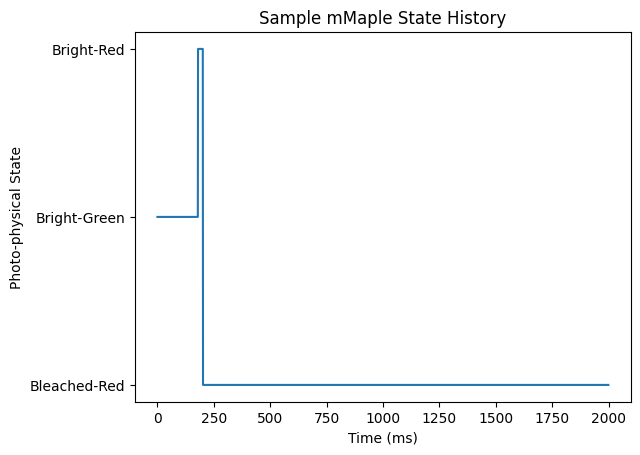

In [24]:
a = vm.sample_plane._objects
times_ms, state_history = [], []
for i,j in a['0'].state_history.items():
    times_ms.append(i)
    state_history.append(j[0].name)
times_ms = np.array(times_ms)
state_history = np.array(state_history)
unique_states = np.unique(state_history)
y_vals_states = []
# 0, 1, 2 ... for each unique state
for i in state_history:
    # check which state it is
    y_vals_states.append(np.where(unique_states == i)[0][0])
# plot the states
plt.plot(times_ms[:2000], y_vals_states[:2000])
# label the y axis with the state names
# remove the underscores from the state names and replace with spaces
unique_states = [i.replace('_', '-') for i in unique_states]
# Upercase for  the first letter of each word
unique_states = [i.title() for i in unique_states]
plt.yticks(np.arange(len(unique_states)), unique_states)
plt.xlabel('Time (ms)')
plt.ylabel('Photo-physical State')
plt.title('Sample mMaple State History')
#plt.savefig('sample_mMaple_state_historyv2.svg', dpi=300)
plt.show()



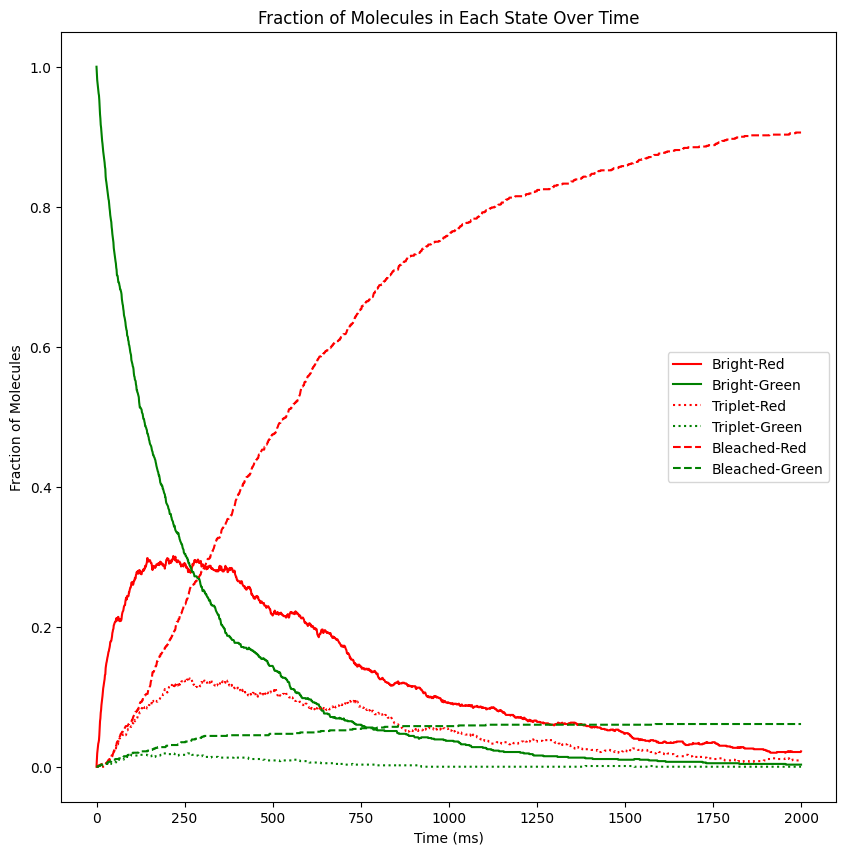

In [25]:
a = vm.sample_plane._objects
times_ms, state_history = [], []
counter = 0
for k,kk in a.items():
    state_history.append([])
    for i,j in kk.state_history.items():
        if counter == 0:
            times_ms.append(i)
        state_history[counter].append(j[0].name)
    counter += 1
times_ms = np.array(times_ms)
state_history = np.array(state_history)
#in each row find the first occurance of bright_red
bright_red_idx = []
for i in range(state_history.shape[0]):
    if 'bright_red' in state_history[i]:
        bright_red_idx.append(np.where(state_history[i] == 'bright_red')[0][0])
    else:
        bright_red_idx.append(np.nan)

# for each column (time) get the fraction of molecules in each state
# find all unique states in the system
unique_states = ["bright_red", "bright_green", "triplet_red", "triplet_green", "bleached_red","bleached_green"]

# colors for unique states
colors = ["red", "green", "red", "green", "red", "green"]
markers = ["*", "*", "-", "-", "x", "x"]
linestyles = ["-", "-", ":", ":", "--", "--"]
fraction_states_time = []
for i in range(state_history.shape[1]):
    # for each time step, find the fraction of molecules in each state
    fraction_states = []
    for j in unique_states:
        fraction_states.append(np.sum(state_history[:,i] == j)/state_history.shape[0])
    fraction_states_time.append(fraction_states)
fraction_states_time = np.array(fraction_states_time)

# make entries unique_states names without _ and replace with " " and Capitalize each word
unique_states = [i.replace("_", "-") for i in unique_states]
unique_states = [i.title() for i in unique_states]
#plot the fraction of molecules in each state over time
fig, ax = plt.subplots(figsize=(10,10))
for i in range(fraction_states_time.shape[1]):
    ax.plot(times_ms, fraction_states_time[:,i], label=unique_states[i], color=colors[i],linestyle = linestyles[i])
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Fraction of Molecules")
plt.title("Fraction of Molecules in Each State Over Time")
#plt.savefig("fraction_molecules_over_time_nonpulsing.svg", dpi=300)
plt.show()


In [26]:
from journalplots import set_style
from matplotlib_scalebar.scalebar import ScaleBar
from microfilm.microplot import microshow
from microfilm import colorify
set_style(font_scale=1)

In [27]:
from tifffile import imread
hilo_frames = imread("sptsingle_v2_mMaple.ome.tiff")
print(hilo_frames.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/baljyot/CODE/GitHub_t2/PHD/AMS_BP/examples/QuantitativeExperiments/PALM/sptPALM/sptsingle_v2_mMaple.ome.tiff'

151 116


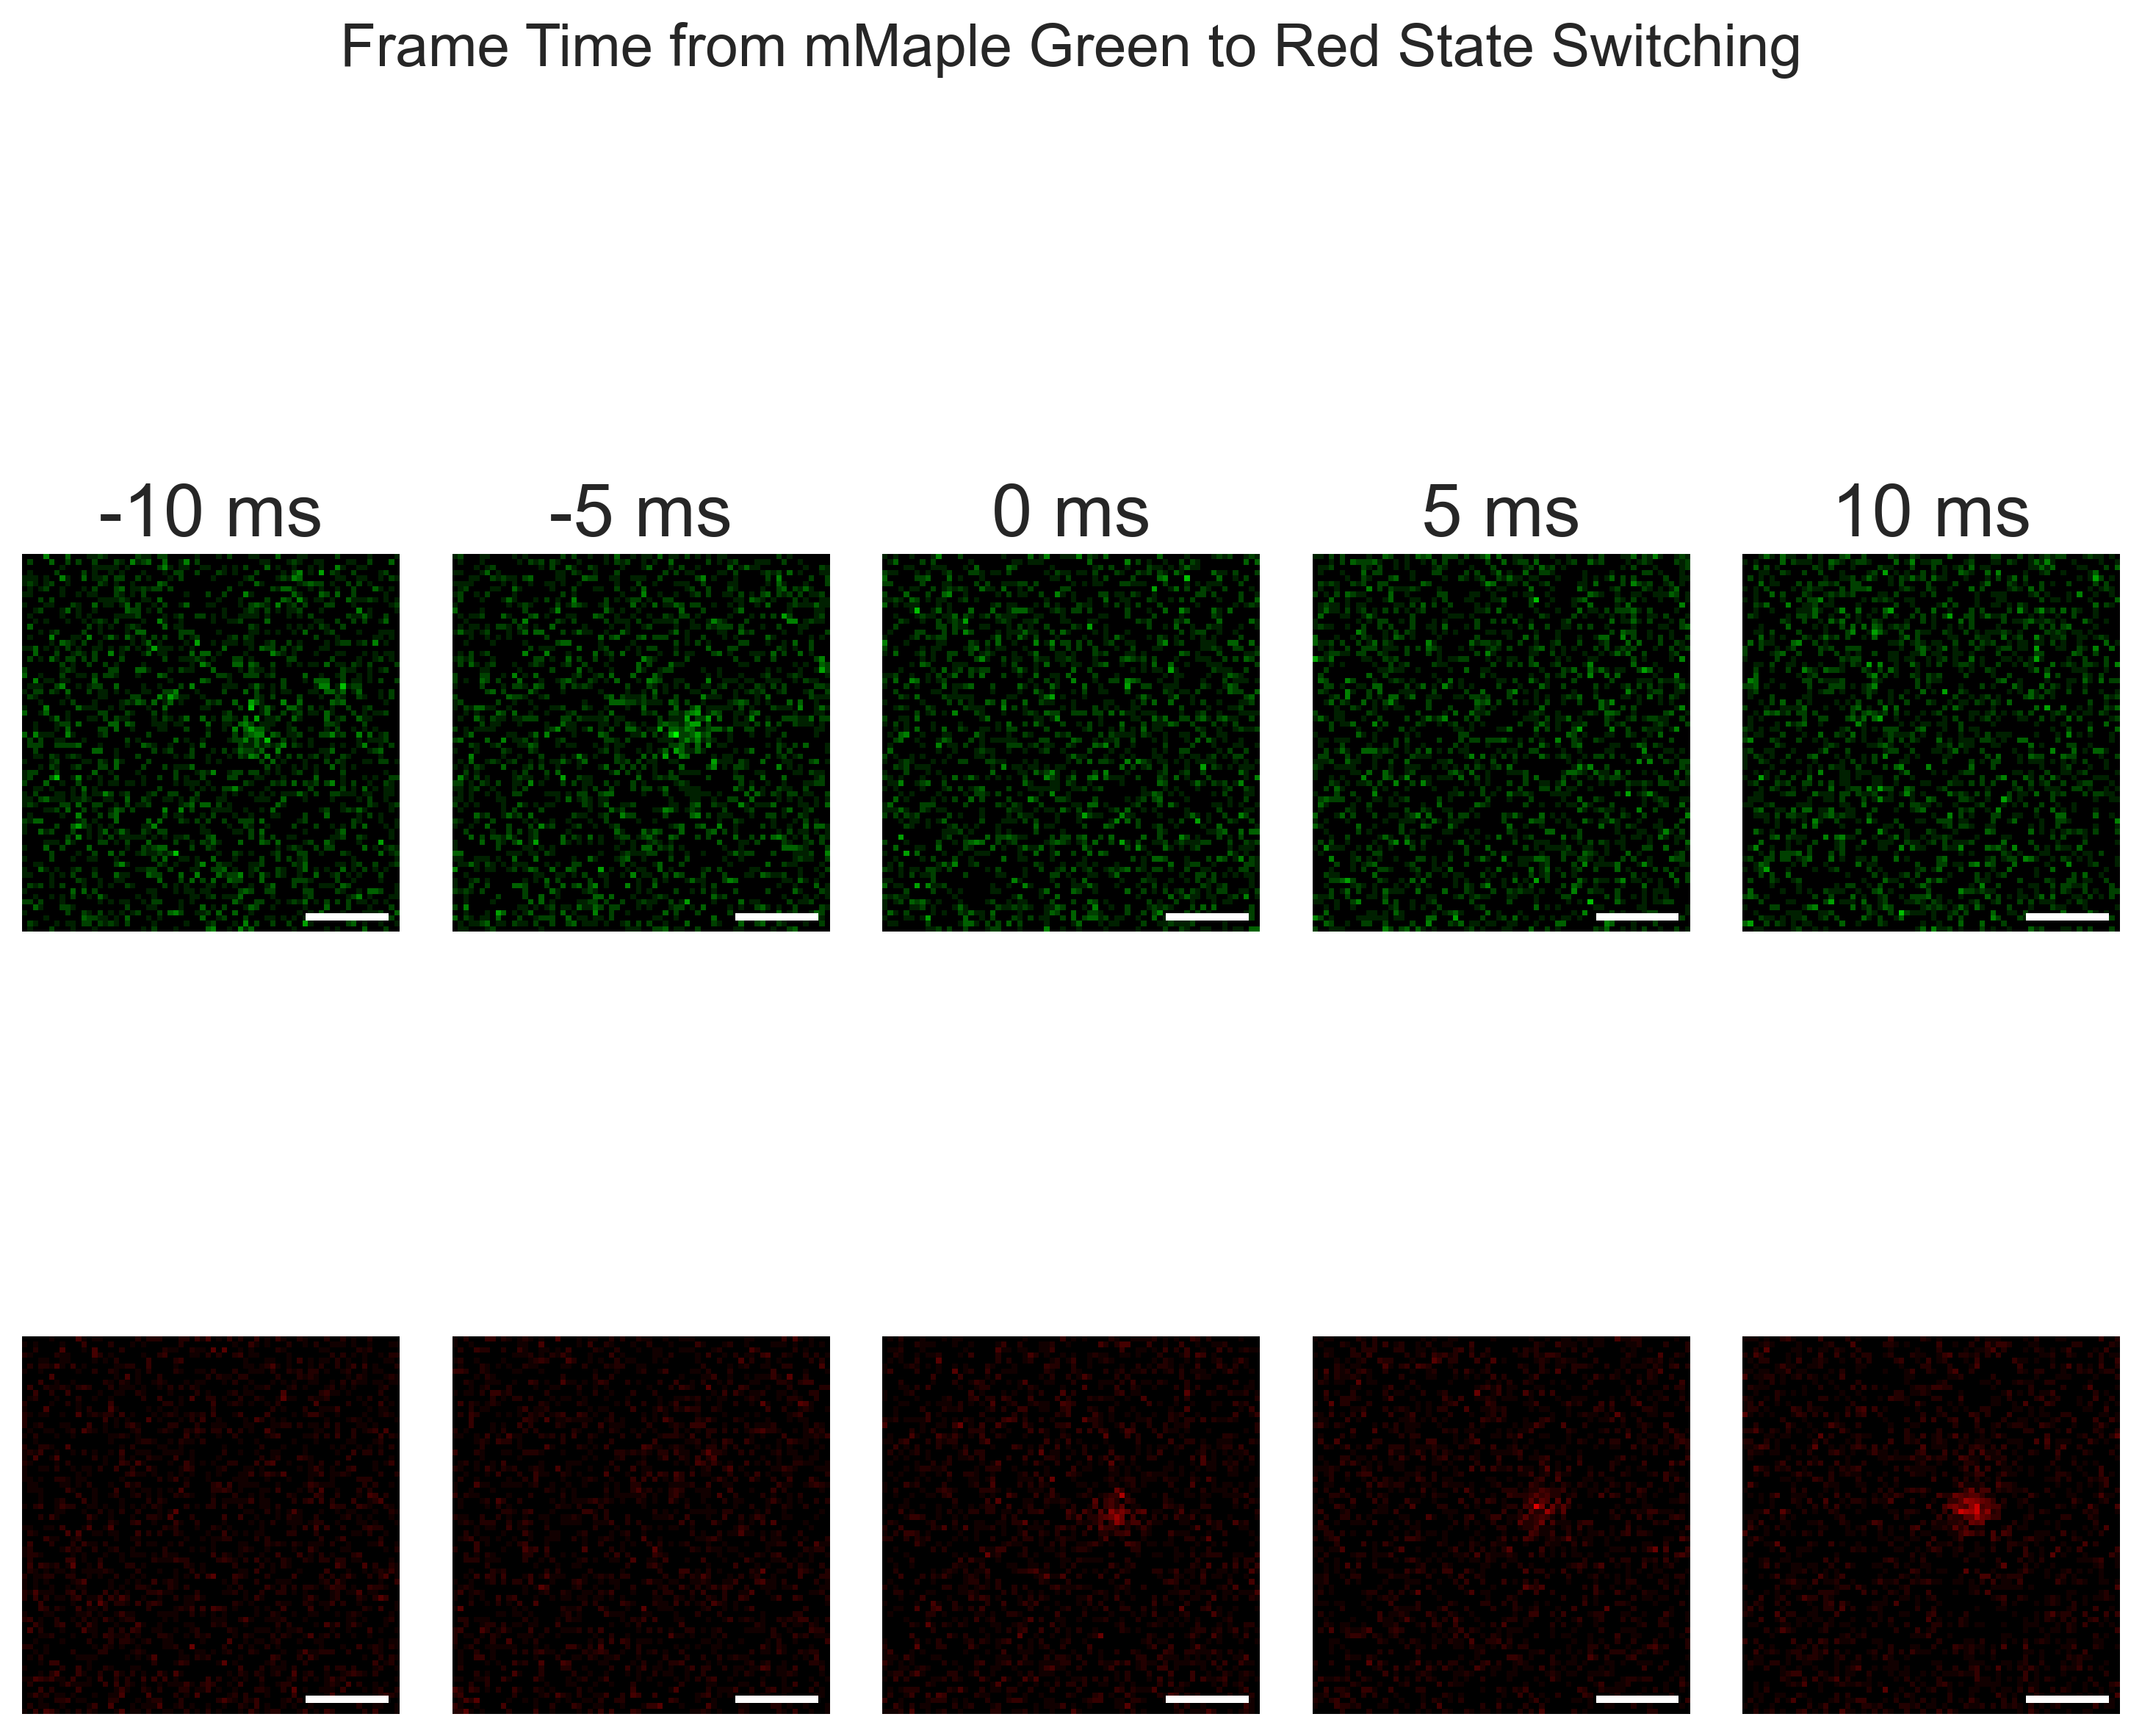

In [ ]:
red_channel = hilo_frames[0]
green_channel = hilo_frames[1]
switching_frame_index = 46
max_red = np.max(red_channel)
max_green = np.max(green_channel)
max_red_frame_index = int(np.argmax(red_channel)/190**2)
max_green_frame_index = int(np.argmax(green_channel)/190**2)
im_red, cmap_red, min_max_red = colorify.colorify_by_name(
red_channel[max_red_frame_index][40:110, 60:130], cmap_name='red', flip_map=False, limits=[0,max_red])
im_green, cmap_green, min_max_green = colorify.colorify_by_name(
green_channel[max_green_frame_index][40:110, 60:130], cmap_name='green', flip_map=False, limits=[0,max_green])
print(max_red, max_green)

fig, ax = plt.subplots(2,5, figsize=(10,10))
for j, i in enumerate([-2,-1,0,1,2]):
    im_redi = red_channel[switching_frame_index + i][40:110, 60:130]
    im_greeni = green_channel[switching_frame_index + i][40:110, 60:130]
    microim_red = microshow(
        images=im_redi, fig_scaling=5,
        cmaps='pure_red',limits = [100,115],rescale_type = 'limits',
        unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=None, label_font_size=0.04, ax =  ax[1, j],
        )
    microim_green = microshow(
        images=im_greeni, fig_scaling=5,
        cmaps='pure_green',limits = [100,108],rescale_type = 'limits',
        unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=None, label_font_size=0.04, ax =  ax[0, j],
        )
    ax[0,j].set_title("{0} ms".format(int(i*5)))
# grid off
for ax in ax.flat:
    ax.label_outer()
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
fig.suptitle("Frame Time from mMaple Green to Red State Switching")
plt.tight_layout()
#plt.savefig('switching_frames.svg', dpi=300)
plt.show()
